# PROBLEM STATEMENT

**Title**: Revenue Prediction for Weekly Supplement Sale

In               the competitive landscape of the health and wellness industry, understanding and predicting revenue trends is crucial for inventory planning, marketing strategies, and overall business growth. This dataset captures weekly sales performance for supplement products, including various features such as product details, pricing, customer demographics, sales channels, and promotional efforts

# Data Loading

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

# Mounting **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading CSV File**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Supplement_Sales_Weekly_With_Nulls.csv")

#**ABOUT DATA SET**

The dataset contains 4,384 records and 10 columns, tracking weekly supplement sales across various products, platforms, and regions. It includes a mix of numerical and categorical data, with some missing values primarily in the numeric fields. Here's what each column represents:

**Date:** The week of the sale (string format).

**Product Name:** Name of the supplement (e.g., Whey Protein, Fish Oil).

**Category:** The product category such as Protein, Vitamin, Omega, etc.

**Units Sold:** Number of units sold in a given week.

**Price:** Price per unit of the product.

**Revenue:** Total revenue generated.

**Discount:** Fractional discount applied (0.0 to 0.25).

**Units Returned:** Number of units returned.

**Location:** Country where the sale took place (e.g., USA, UK, Canada).

**Platform:** E-commerce platform such as Amazon, Walmart, or iHerb.

**Data Quality:**
There are 219 rows with missing values in numerical columns like Units Sold, Price, Revenue, Discount, and Units Returned.

**Numerical Data Insights:**
Units Sold range from 103 to 194, averaging ~150 units.

Price ranges between $10 and $59.97, with an average of ~$34.67.

Revenue varies from $1,284 to $10,761, with an average of ~$5,238.

Discounts applied vary from 0 to 0.25, averaging ~0.12.

Units Returned range from 0 to 8, with an average return rate of ~1.5 units per sale.

**Categorical Distribution:**
Most frequent platforms: iHerb, Amazon, and Walmart.

**Top regions:** USA, UK, and Canada.

Popular product categories include Vitamin, Protein, and Omega-based products.

Frequent supplements include Whey Protein, Multivitamins, Vitamin C, and Fish Oil.

In [4]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143.0,31.98,4573.14,0.03,2.0,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139.0,42.51,5908.89,NaN,0.0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161.0,12.91,2078.51,0.25,0.0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140.0,16.07,2249.80,0.08,0.0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157.0,35.47,5568.79,0.25,3.0,Canada,iHerb
...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160.0,47.79,7646.40,0.21,1.0,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154.0,NaN,5870.48,0.22,1.0,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139.0,20.40,2835.60,0.12,3.0,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,NaN,18.31,2819.74,0.23,2.0,Canada,Amazon


In [5]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143.0,31.98,4573.14,0.03,2.0,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139.0,42.51,5908.89,NaN,0.0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161.0,12.91,2078.51,0.25,0.0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140.0,16.07,2249.80,0.08,0.0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157.0,35.47,5568.79,0.25,3.0,Canada,iHerb


In [6]:
df.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160.0,47.79,7646.40,0.21,1.0,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154.0,NaN,5870.48,0.22,1.0,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139.0,20.40,2835.60,0.12,3.0,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,NaN,18.31,2819.74,0.23,2.0,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178.0,39.12,6963.36,0.23,0.0,UK,iHerb


#**DATA INSPECTION**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4165 non-null   float64
 4   Price           4165 non-null   float64
 5   Revenue         4165 non-null   float64
 6   Discount        4165 non-null   float64
 7   Units Returned  4165 non-null   float64
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(5), object(5)
memory usage: 342.6+ KB


In [8]:
cat_column=df.select_dtypes("object").columns
cat_column

Index(['Date', 'Product Name', 'Category', 'Location', 'Platform'], dtype='object')

In [9]:
num_column=df.select_dtypes(["int","float"]).columns
num_column

Index(['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned'], dtype='object')

#**DATA Cleaning**

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
Date,0
Product Name,0
Category,0
Units Sold,219
Price,219
Revenue,219
Discount,219
Units Returned,219
Location,0
Platform,0


In [12]:
columns_to_fill = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df.isnull().sum()


,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(4384, 10)

In [16]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

# **Univariate Analysis**

## **Summary Statistics**

In [17]:
df.sample()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
3818,2024-07-29,Ashwagandha,Herbal,148.0,34.58,5117.84,0.13,1.0,Canada,Walmart


In [18]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.296999,34.666744,5238.691011,0.124485,1.537095
std,12.041184,13.820063,2141.183712,0.069926,1.231713
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,23.147500,3497.155000,0.070000,1.000000
50%,150.296999,34.666744,5238.691011,0.124485,1.000000
75%,158.000000,45.990000,6898.767500,0.180000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [19]:
df.describe(include="object")

,Date,Product Name,Category,Location,Platform
count,4384,4384,4384,4384,4384
unique,274,16,10,3,3
top,2025-03-31,Whey Protein,Vitamin,Canada,iHerb
freq,16,274,822,1507,1499


# **Distribution plot**

<ipython-input-20-281e9a4e7c9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product Name', data=df, palette='pastel')


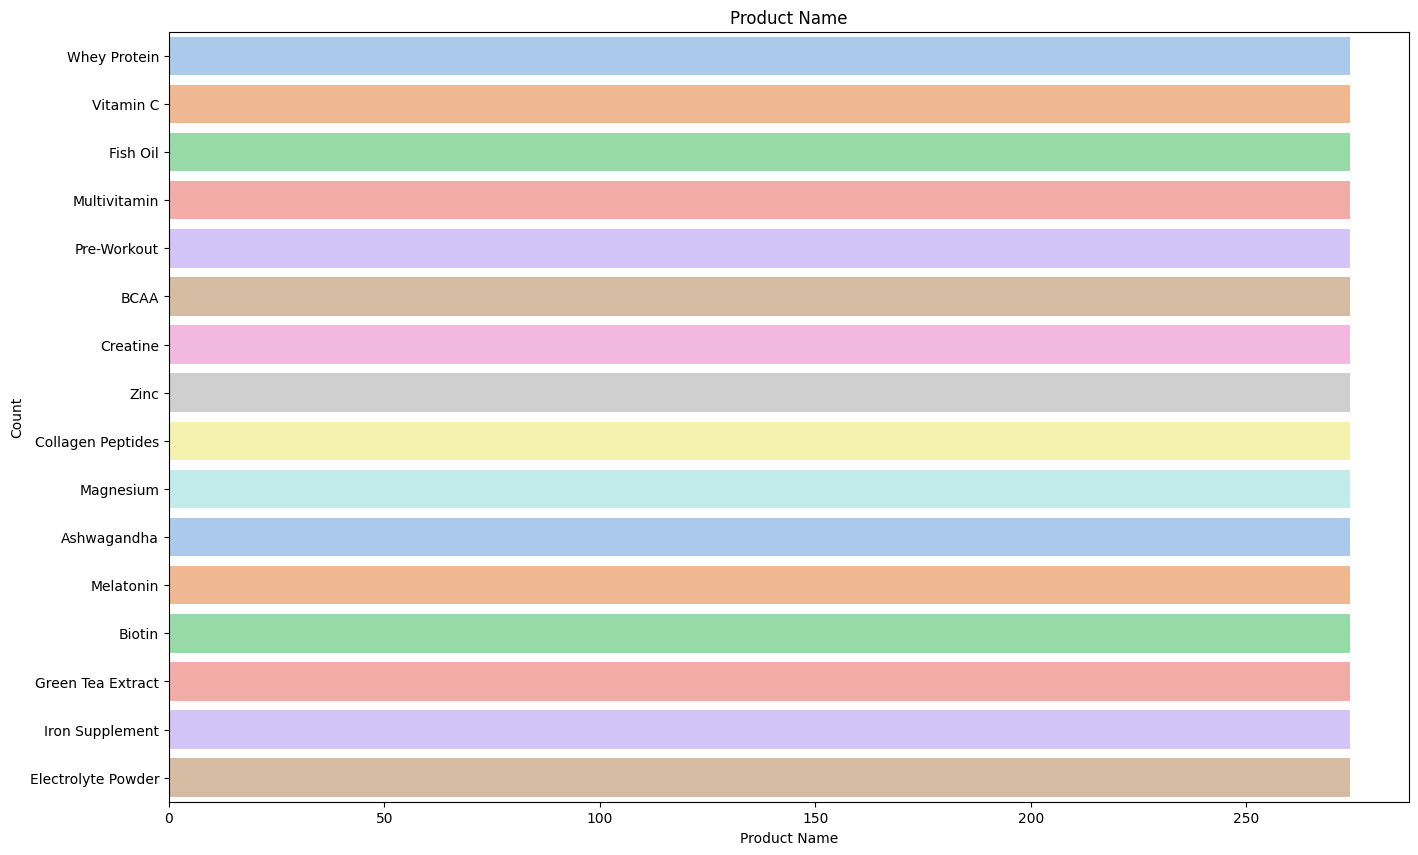

In [20]:
plt.figure(figsize=(16, 10))
sns.countplot(y='Product Name', data=df, palette='pastel')
plt.title('Product Name')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

<ipython-input-21-6463389c78ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='pastel')


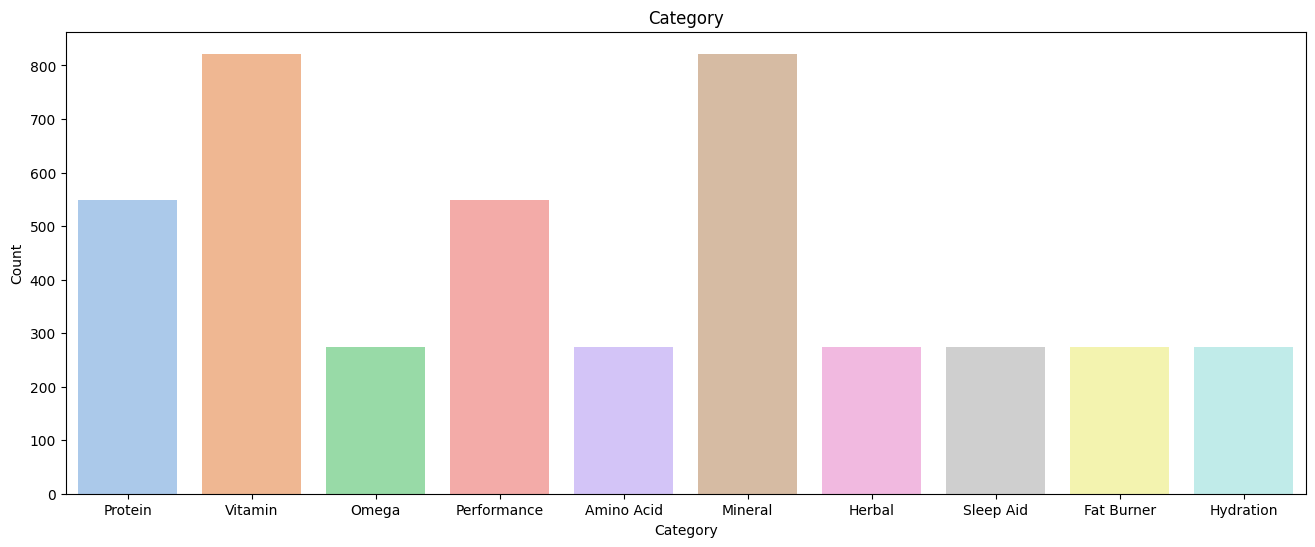

In [21]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Category', data=df, palette='pastel')
plt.title('Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<ipython-input-22-03b0b560b759>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df, palette='pastel')


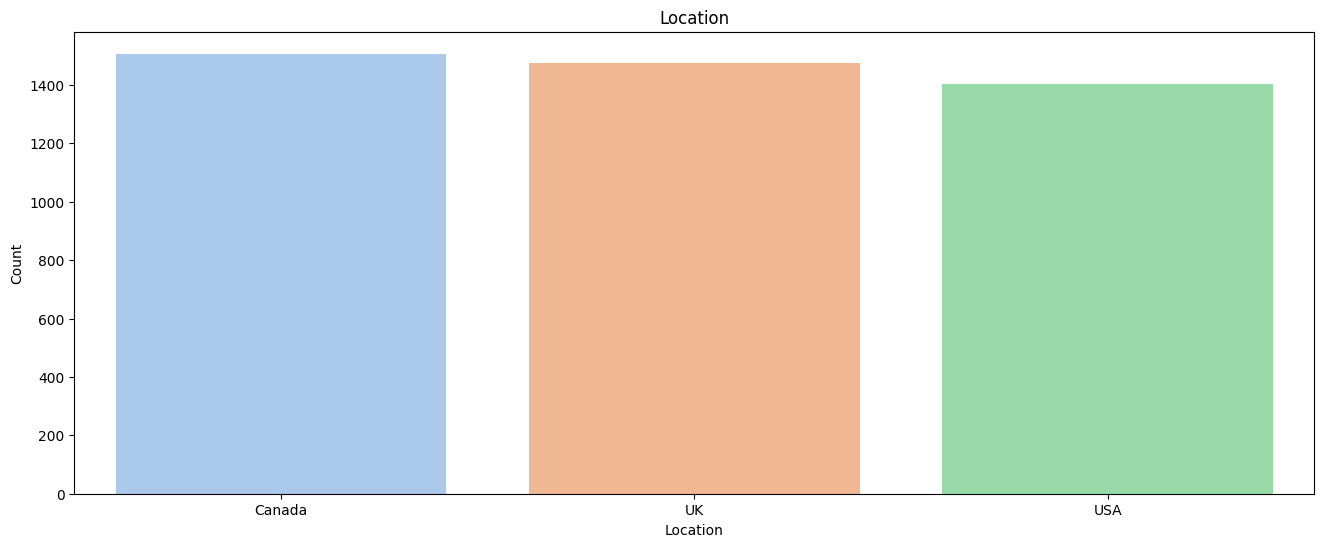

In [22]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Location', data=df, palette='pastel')
plt.title('Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

<ipython-input-23-5c820395a342>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Platform', data=df, palette='pastel')


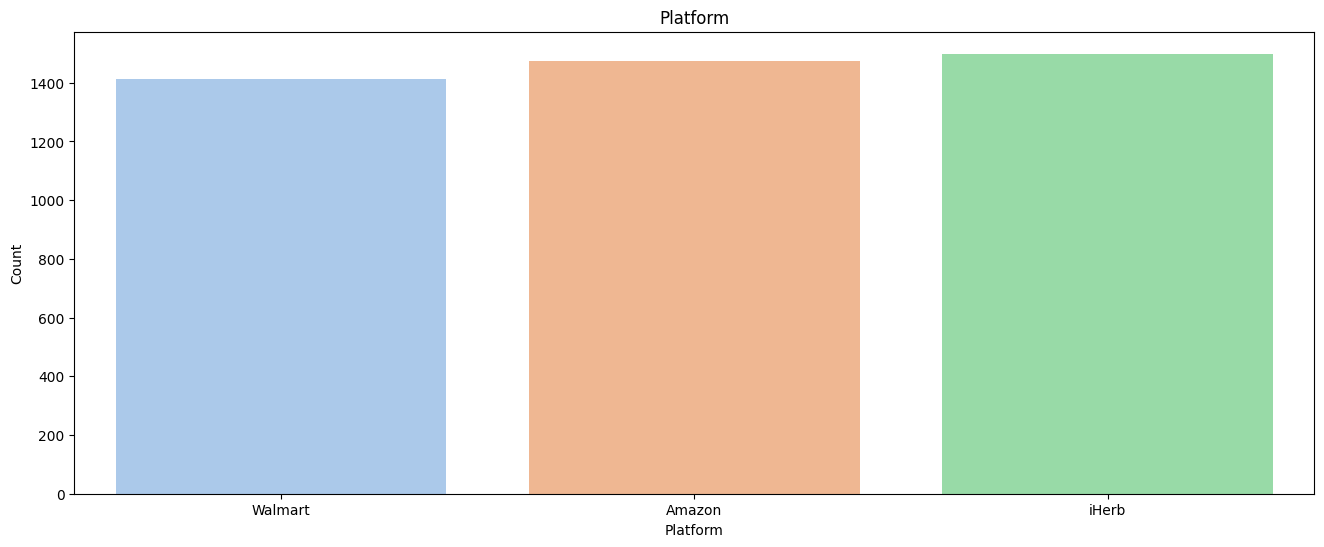

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Platform', data=df, palette='pastel')
plt.title('Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

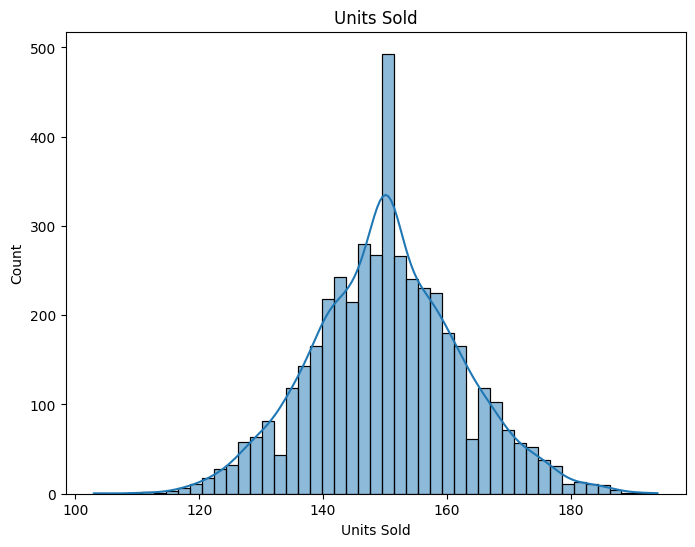

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Units Sold', data=df, kde=True)
plt.title('Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Count')
plt.show()

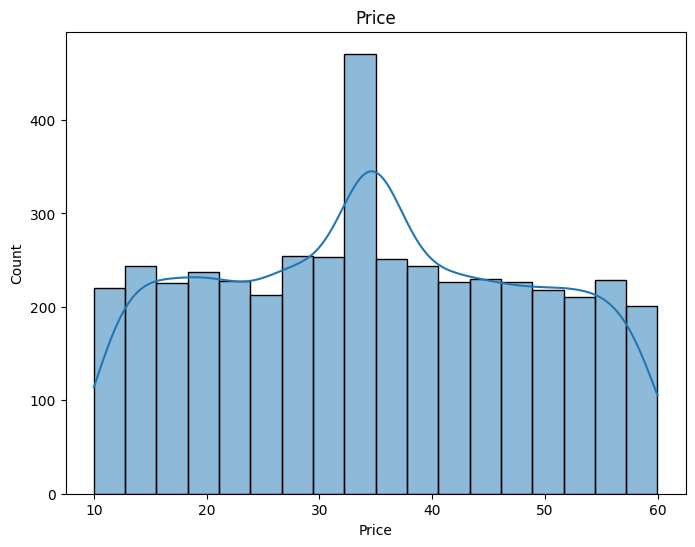

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Price', data=df, kde=True)
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

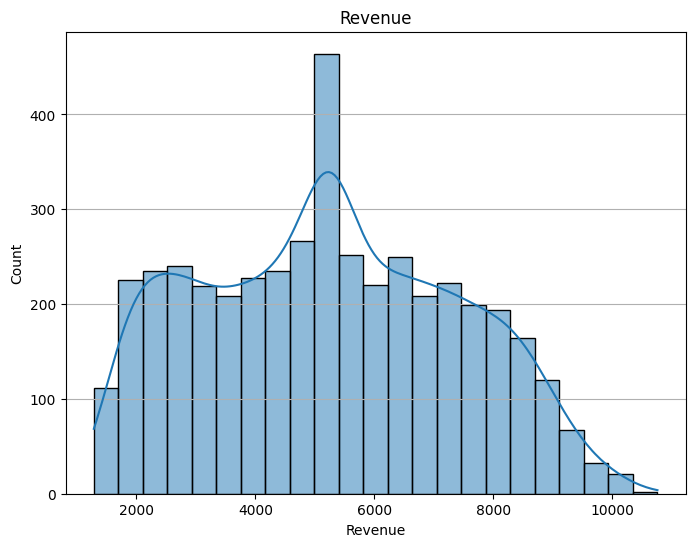

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Revenue', data=df, kde=True)
plt.title('Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

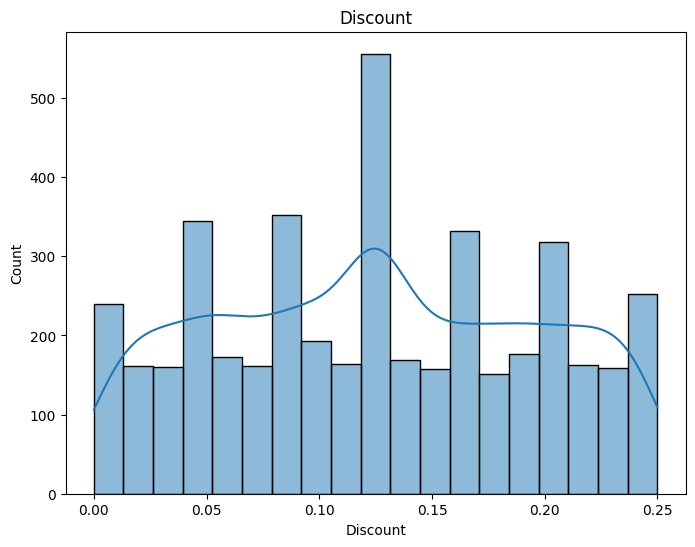

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Discount', data=df, kde=True)
plt.title('Discount')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

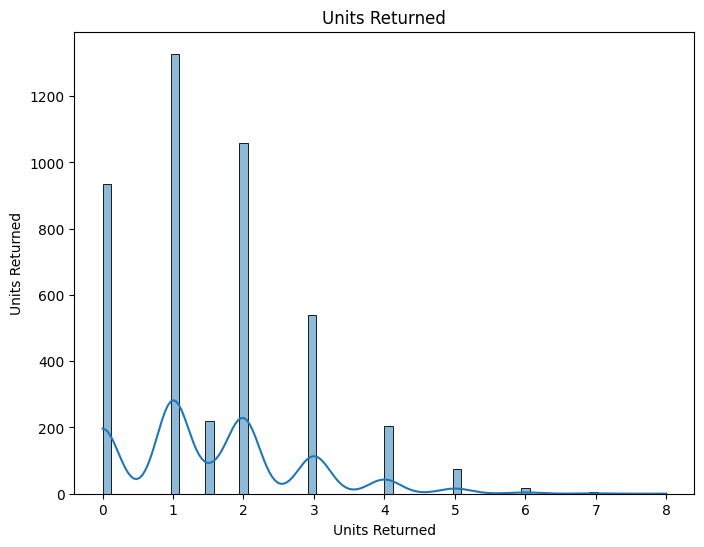

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Units Returned', data=df, kde=True)
plt.title('Units Returned')
plt.xlabel('Units Returned')
plt.ylabel('Units Returned')
plt.show()

# **Bivariate Analysis**

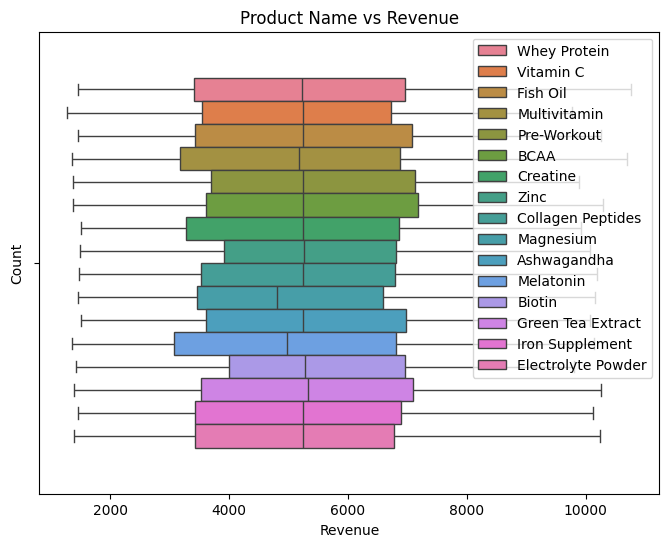

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Product Name', data=df)
plt.title('Product Name vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


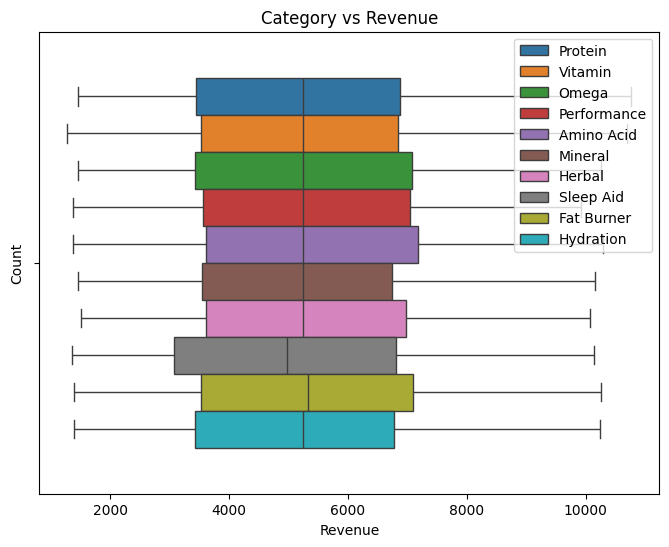

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Category', data=df)
plt.title('Category vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


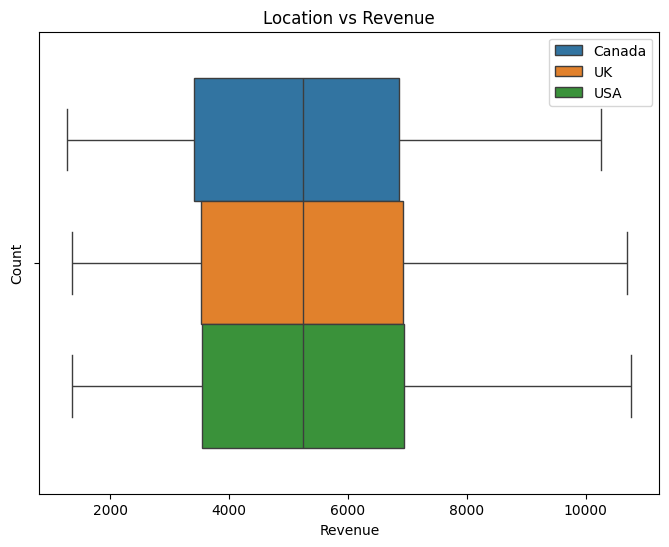

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Location', data=df)
plt.title('Location vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

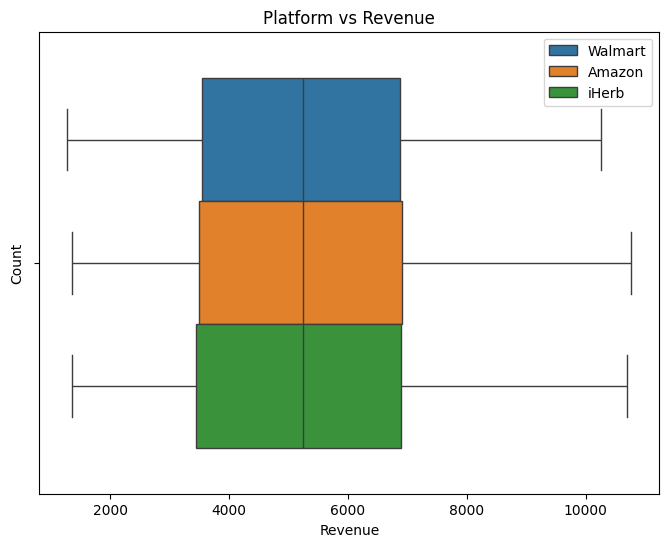

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Platform', data=df)
plt.title('Platform vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

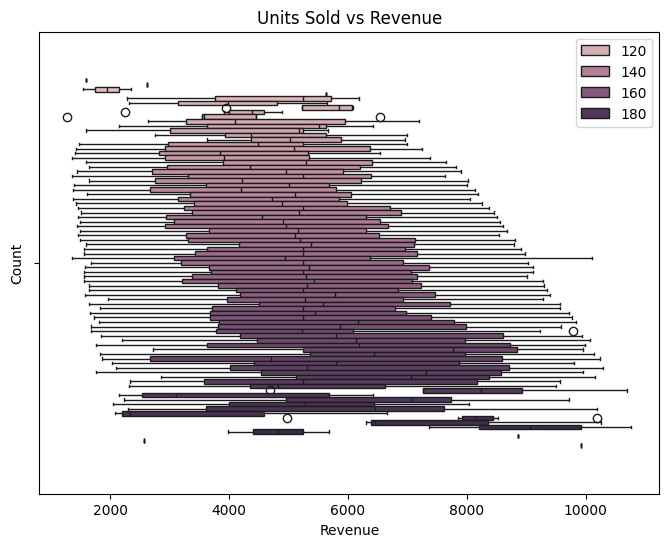

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Units Sold', data=df)
plt.title('Units Sold vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

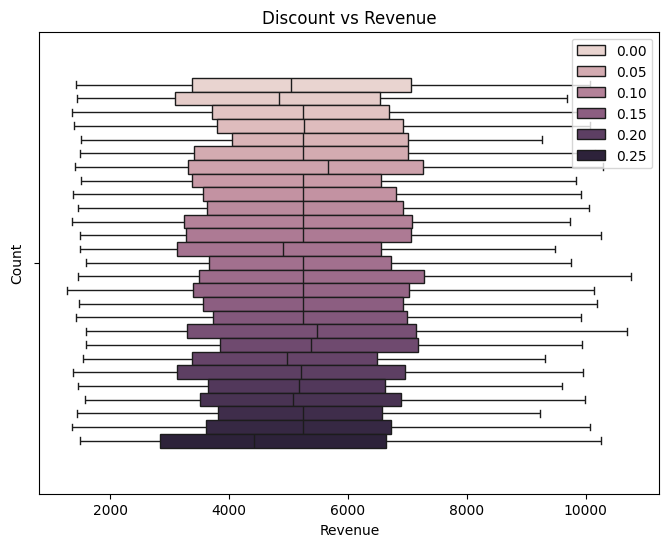

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Discount', data=df)
plt.title('Discount vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

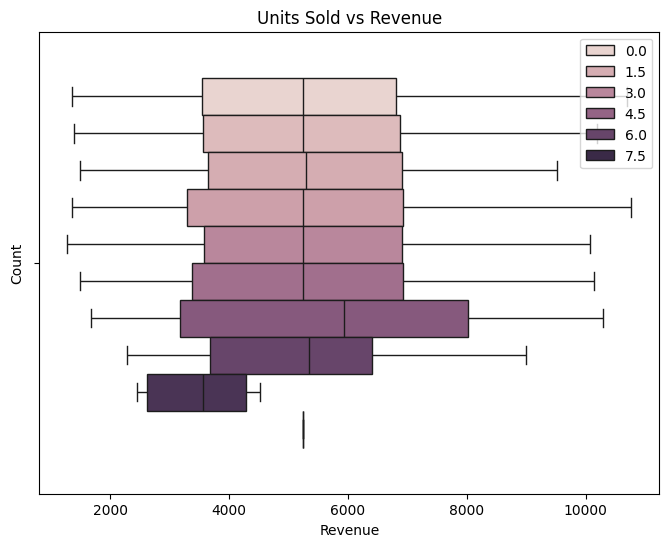

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue',hue='Units Returned', data=df)
plt.title('Units Sold vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

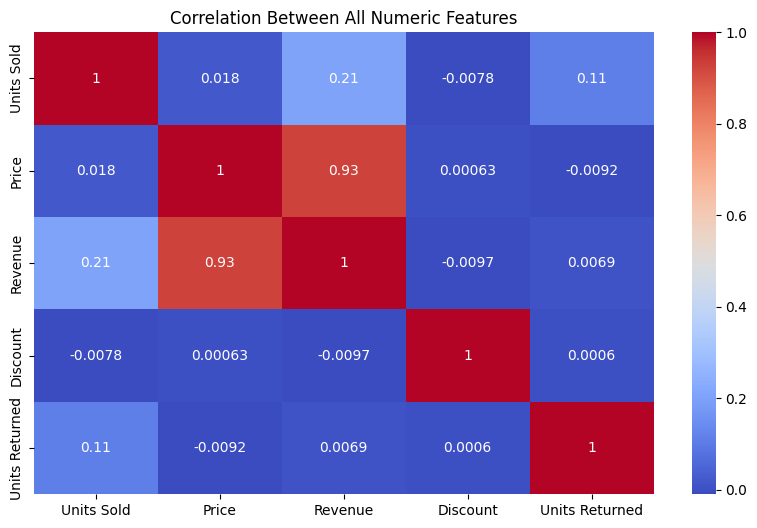

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_column].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between All Numeric Features")
plt.show()

# Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

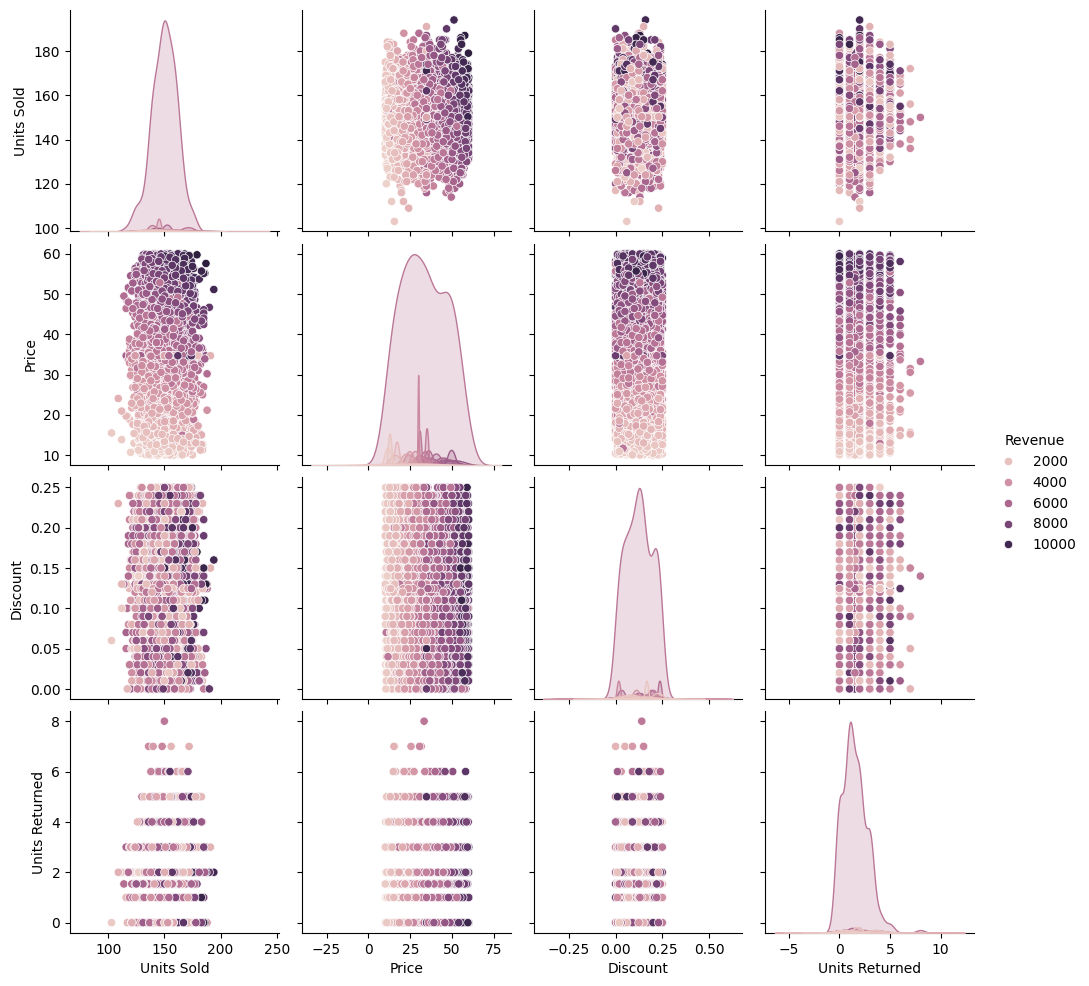

In [37]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, diag_kind='kde',hue='Revenue')
plt.show()

# Identifying Outliers

In [38]:
# Identify numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col}: {outliers.shape[0]} outliers")

Units Sold: 38 outliers
Price: 0 outliers
Revenue: 0 outliers
Discount: 0 outliers
Units Returned: 302 outliers


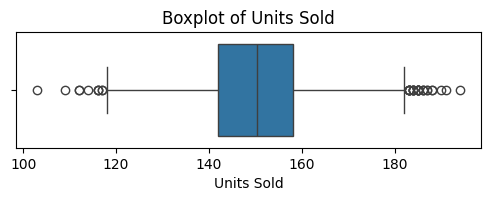

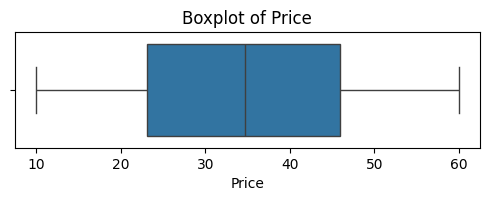

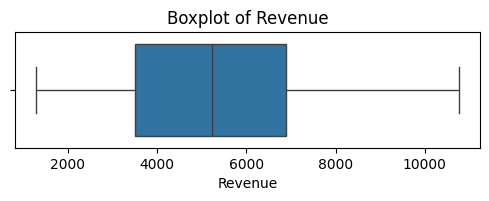

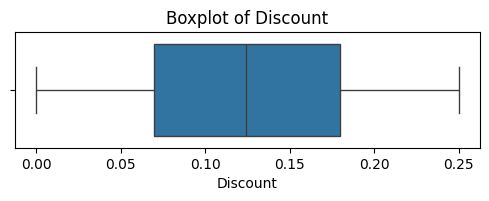

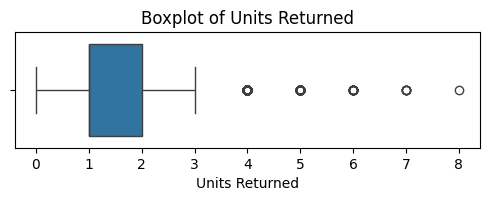

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [40]:
# List of columns you want to check for outliers
columns = ['Units Sold', 'Units Returned']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

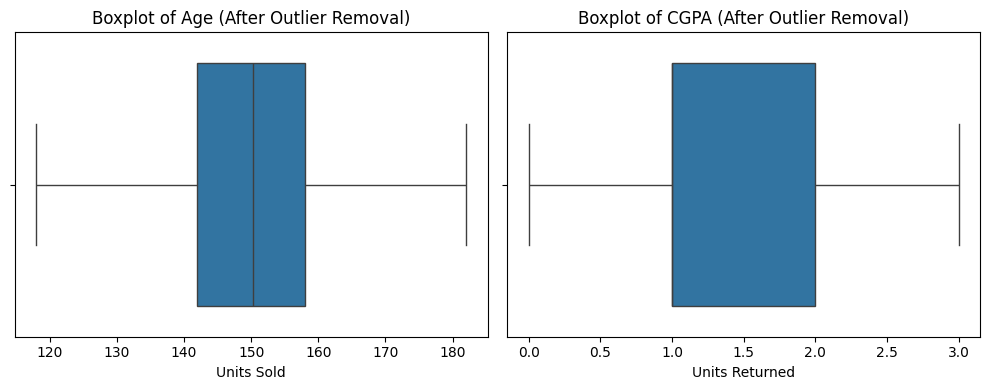

In [41]:
plt.figure(figsize=(10, 4))
# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Units Sold'])
plt.title("Boxplot of Age (After Outlier Removal)")

# Boxplot for CGPA
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Units Returned'])
plt.title("Boxplot of CGPA (After Outlier Removal)")

plt.tight_layout()
plt.show()

In [42]:
df.head(2)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143.0,31.98,4573.14,0.030000,2.0,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139.0,42.51,5908.89,0.124485,0.0,UK,Amazon


In [43]:
df.dtypes

,0
Date,object
Product Name,object
Category,object
Units Sold,float64
Price,float64
Revenue,float64
Discount,float64
Units Returned,float64
Location,object
Platform,object


In [44]:
for col in cat_column:
    print(f"{col}: {df[col].unique()}")

Date: ['2020-01-06' '2020-01-13' '2020-01-20' '2020-01-27' '2020-02-03'
 '2020-02-10' '2020-02-17' '2020-02-24' '2020-03-02' '2020-03-09'
 '2020-03-16' '2020-03-23' '2020-03-30' '2020-04-06' '2020-04-13'
 '2020-04-20' '2020-04-27' '2020-05-04' '2020-05-11' '2020-05-18'
 '2020-05-25' '2020-06-01' '2020-06-08' '2020-06-15' '2020-06-22'
 '2020-06-29' '2020-07-06' '2020-07-13' '2020-07-20' '2020-07-27'
 '2020-08-03' '2020-08-10' '2020-08-17' '2020-08-24' '2020-08-31'
 '2020-09-07' '2020-09-14' '2020-09-21' '2020-09-28' '2020-10-05'
 '2020-10-12' '2020-10-19' '2020-10-26' '2020-11-02' '2020-11-09'
 '2020-11-16' '2020-11-23' '2020-11-30' '2020-12-07' '2020-12-14'
 '2020-12-21' '2020-12-28' '2021-01-04' '2021-01-11' '2021-01-18'
 '2021-01-25' '2021-02-01' '2021-02-08' '2021-02-15' '2021-02-22'
 '2021-03-01' '2021-03-08' '2021-03-15' '2021-03-22' '2021-03-29'
 '2021-04-05' '2021-04-12' '2021-04-19' '2021-04-26' '2021-05-03'
 '2021-05-10' '2021-05-17' '2021-05-24' '2021-05-31' '2021-06-07'
 '20

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [46]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,-0.598665,-0.192558,-0.306581,-1.353264,0.705302,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,-0.943733,0.570027,0.321861,-0.003118,-1.371414,UK,Amazon
2,2020-01-06,Fish Oil,Omega,0.954140,-1.573612,-1.480252,1.790432,-1.371414,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,-0.857466,-1.344764,-1.399664,-0.638788,-1.371414,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,0.609072,0.060188,0.161851,1.790432,1.743660,Canada,iHerb


In [47]:
df[num_cols].describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4.047000e+03,4.047000e+03,4.047000e+03,4.047000e+03,4.047000e+03
mean,8.076344e-16,-8.251917e-17,-2.510690e-16,-1.615269e-16,1.413360e-16
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-2.755339e+00,-1.784355e+00,-1.854052e+00,-1.781950e+00,-1.371414e+00
25%,-6.849320e-01,-8.287700e-01,-7.998524e-01,-7.816830e-01,-3.330563e-01
50%,3.082481e-02,2.016481e-03,6.546418e-03,-3.118266e-03,-3.330563e-01
75%,6.953393e-01,8.202389e-01,7.764563e-01,7.901648e-01,7.053018e-01
max,2.765746e+00,1.834484e+00,2.569531e+00,1.790432e+00,1.743660e+00


In [48]:
X = df.drop(['Revenue', 'Date'], axis=1)#Split Features and Target
y = df['Revenue']

In [49]:
#Train-Test Split the data will defided into 4 part X_train, X_test, y_train, y_test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_X_train = ['Product Name', 'Category', 'Location', 'Platform'] # Removed 'Date'

for col in categorical_X_train:
    # Fit and transform on the specific column of X_train
    X_train[col] = le.fit_transform(X_train[col])
    # Transform X_test using the same encoder
    X_test[col] = le.transform(X_test[col])

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3237, 8)
X_test shape: (810, 8)
y_train shape: (3237,)
y_test shape: (810,)


In [53]:
X_train.head()

,Product Name,Category,Units Sold,Price,Discount,Units Returned,Location,Platform
1739,10,8,-1.202534,0.304969,0.504374,-1.371414,1,1
3404,2,9,1.816810,-0.997871,-1.353264,-1.371414,1,1
3762,6,5,1.644276,-1.669931,1.504641,0.705302,1,2
4162,6,5,-0.684932,1.104488,1.647536,-0.333056,0,1
4142,8,4,-0.253597,-0.115793,-1.639055,-0.333056,0,0


# **Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression R-squared: {r2:.2f}")

Linear Regression Mean Squared Error: 0.10
Linear Regression R-squared: 0.90


# **Random Forest**

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor() # Changed from RandomForestClassifier to RandomForestRegressor
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate using regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}") # Print MSE
print(f"Random Forest R-squared: {r2_rf:.2f}") # Print R-squared

Random Forest Mean Squared Error: 0.10
Random Forest R-squared: 0.90


# **Support Vector Machine (SVM)**

In [56]:
from sklearn.svm import SVR # Import SVR instead of SVC
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

svm_model = SVR() # Use SVR for regression
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluate using regression metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Mean Squared Error: {mse_svm:.2f}")
print(f"SVM R-squared: {r2_svm:.2f}")

SVM Mean Squared Error: 0.10
SVM R-squared: 0.90


#**K-Nearest Neighbors (KNN)**

In [57]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

knn_model = KNeighborsRegressor() # Changed from KNeighborsClassifier to KNeighborsRegressor
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluate using regression metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn:.2f}") # Print MSE
print(f"KNN R-squared: {r2_knn:.2f}") # Print R-squared

KNN Mean Squared Error: 0.21
KNN R-squared: 0.79


# **XGBoost**

In [58]:
from xgboost import XGBRegressor # Import XGBRegressor instead of XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics


xgb_model = XGBRegressor() # Changed from XGBClassifier to XGBRegressor
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate using regression metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}") # Print MSE
print(f"XGBoost R-squared: {r2_xgb:.2f}") # Print R-squared

XGBoost Mean Squared Error: 0.11
XGBoost R-squared: 0.89


# **Linear Regression – Evaluation**

In [59]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit
lin_model = LinearRegression() # Changed to LinearRegression
lin_model.fit(X_train, y_train)

# Predict
y_pred_lin = lin_model.predict(X_test)

# Evaluation metrics (for regression)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression Mean Squared Error: {mse_lin:.2f}")
print(f"Linear Regression R-squared: {r2_lin:.2f}")

Linear Regression Mean Squared Error: 0.10
Linear Regression R-squared: 0.90


# **Random Forest Evaluation**

In [60]:
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

# Initialize and fit
rf_model = RandomForestRegressor(random_state=42) # Changed to RandomForestRegressor
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics (for regression)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")

Random Forest Mean Squared Error: 0.10
Random Forest R-squared: 0.90


#**SVM Evaluation**

In [61]:
from sklearn.svm import SVR # Import SVR instead of SVC
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

# Initialize and fit
svm_model = SVR() # Use SVR for regression
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate using regression metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Mean Squared Error: {mse_svm:.2f}")
print(f"SVM R-squared: {r2_svm:.2f}")

SVM Mean Squared Error: 0.10
SVM R-squared: 0.90


# **KNN Evaluation**

In [62]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

# Initialize and fit
knn_model = KNeighborsRegressor() # Changed from KNeighborsClassifier to KNeighborsRegressor
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate using regression metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn:.2f}") # Print MSE
print(f"KNN R-squared: {r2_knn:.2f}") # Print R-squared

KNN Mean Squared Error: 0.21
KNN R-squared: 0.79


# **XGBoost Evaluation**

In [63]:
from xgboost import XGBRegressor # Import XGBRegressor instead of XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics


xgb_model = XGBRegressor() # Changed from XGBClassifier to XGBRegressor
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate using regression metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}") # Print MSE
print(f"XGBoost R-squared: {r2_xgb:.2f}") # Print R-squared

XGBoost Mean Squared Error: 0.11
XGBoost R-squared: 0.89


##**Logistic Regression - Hyperparameter Tuning**

In [64]:
import numpy as np

# Example: Convert a continuous target into binary classes based on a threshold
threshold = y_train.median()  # or choose any meaningful value
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and fit
log_model = LogisticRegression()
log_model.fit(X_train, y_train_class)

# Predict
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("Classification Report:\n", classification_report(y_test_class, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test_class, y_prob_log))


Logistic Regression Accuracy: 0.9407407407407408
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       416
           1       0.95      0.93      0.94       394

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810

Confusion Matrix:
 [[396  20]
 [ 28 366]]
ROC AUC Score: 0.9772549785240141


##**Random Forest- Hyperparameter Tuning**

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# Fit classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_class)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

# Binarize the labels for multi-class ROC AUC
y_test_binarized = label_binarize(y_test_class, classes=[0, 1, 2])

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test_class, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_rf))
print("ROC AUC Score (macro):", roc_auc_score(y_test_binarized, y_prob_rf, average='macro'))


Random Forest Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       416
           1       0.93      0.96      0.94       394

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810

Confusion Matrix:
 [[387  29]
 [ 16 378]]
ROC AUC Score (macro): 0.9753819308863725


## **SVM Evaluation- Hyperparameter Tuning**

In [66]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize



# Initialize and fit the model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train_class)

# Predict
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

# Binarize the test labels for ROC AUC calculation
y_test_binarized = label_binarize(y_test_class, classes=[0, 1, 2])

# Evaluation metrics
print("SVM Accuracy:", accuracy_score(y_test_class, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_svm))
print("ROC AUC Score (macro):", roc_auc_score(y_test_binarized, y_prob_svm, average='macro'))


SVM Accuracy: 0.937037037037037

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       416
           1       0.95      0.92      0.93       394

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810

Confusion Matrix:
 [[395  21]
 [ 30 364]]
ROC AUC Score (macro): 0.9760713588442015


## **KNN Evaluation- Hyperparameter Tuning**

In [67]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize



# Initialize and fit the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_class)

# Predict class labels and probabilities
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)

# Binarize the test labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test_class, classes=[0, 1, 2])

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test_class, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_knn))
print("ROC AUC Score (macro):", roc_auc_score(y_test_binarized, y_prob_knn, average='macro'))


KNN Accuracy: 0.8654320987654321

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       416
           1       0.87      0.85      0.86       394

    accuracy                           0.87       810
   macro avg       0.87      0.86      0.87       810
weighted avg       0.87      0.87      0.87       810

Confusion Matrix:
 [[367  49]
 [ 60 334]]
ROC AUC Score (macro): 0.9377562475595471


## **XGBoost Evaluation- Hyperparameter Tuning**

In [68]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize



# Initialize and fit the XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_class)

# Predict classes and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)

# Binarize the test labels for multiclass ROC AUC
y_test_binarized = label_binarize(y_test_class, classes=[0, 1, 2])

# Evaluation metrics
print("XGBoost Accuracy:", accuracy_score(y_test_class, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_xgb))
print("ROC AUC Score (macro):", roc_auc_score(y_test_binarized, y_prob_xgb, average='macro'))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.937037037037037

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       416
           1       0.92      0.95      0.94       394

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810

Confusion Matrix:
 [[385  31]
 [ 20 374]]
ROC AUC Score (macro): 0.9730818039828192


In [69]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Define parameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of penalty
    'solver': ['liblinear']        # 'liblinear' supports L1 penalty
}

# Setup GridSearchCV
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train_class)  # Use y_train_class here!

# Best parameters and score
print("Best Parameters (Logistic Regression):", grid_log.best_params_)
print("Best Score (Logistic Regression):", grid_log.best_score_)


Best Parameters (Logistic Regression): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (Logistic Regression): 0.9335770984792108


In [70]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Convert continuous target to 3 discrete classes (you can adjust q=3 to your use case)
y_train_class = pd.qcut(y_train, q=3, labels=[0, 1, 2])

# Define hyperparameter distribution
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# RandomizedSearchCV setup
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Use the discretized labels for fitting
random_rf.fit(X_train, y_train_class)

# Output best parameters and score
print("Best Parameters (Random Forest):", random_rf.best_params_)
print("Best Score (Random Forest):", random_rf.best_score_)


Best Parameters (Random Forest): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best Score (Random Forest): 0.898671609514983


In [71]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize classifier and RandomizedSearchCV
knn_model = KNeighborsClassifier()
random_knn = RandomizedSearchCV(
    knn_model,
    param_distributions=param_grid_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

#  Use y_train_class (not the original y_train)
random_knn.fit(X_train, y_train_class)

# Output best parameters and score
print("Best Parameters (KNN):", random_knn.best_params_)
print("Best Score (KNN):", random_knn.best_score_)


Best Parameters (KNN): {'weights': 'distance', 'n_neighbors': 27, 'metric': 'manhattan'}
Best Score (KNN): 0.7840569962027972


In [72]:
import joblib

# Save your train-test data
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [73]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score


# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(
    eval_metric='mlogloss',      # for multi-class
    use_label_encoder=False,
    verbosity=0,
    random_state=42
)

# Randomized Search CV
random_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

#  Use the categorical labels
random_xgb.fit(X_train, y_train_class)

# Output best parameters and score
print("Best Parameters (XGBoost):", random_xgb.best_params_)
print("Best CV Score (XGBoost):", random_xgb.best_score_)


Best Parameters (XGBoost): {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best CV Score (XGBoost): 0.9131886007594405


In [74]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Convert regression target to classification labels (e.g., 3 classes: low/medium/high)
y_train_class = pd.qcut(y_train, q=3, labels=[0, 1, 2])
y_test_class = pd.qcut(y_test, q=3, labels=[0, 1, 2])

# Initialize models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Store models in dictionary
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

# Evaluate all models
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train_class)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_class, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8852
Random Forest Accuracy: 0.8815
SVM Accuracy: 0.8765


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8938
KNN Accuracy: 0.7210


#**Model Accuracy Comparsion**

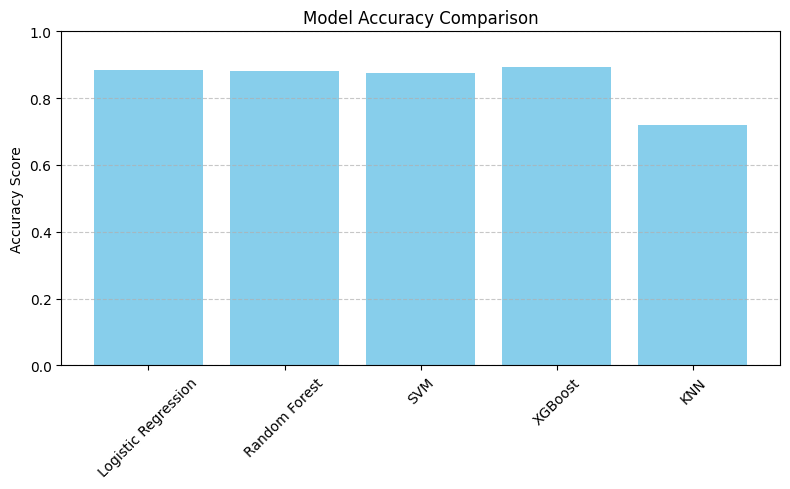

In [75]:
import matplotlib.pyplot as plt

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# Get probabilities for all classes (multi-class)
y_prob_log = log_model.predict_proba(X_test)
y_prob_rf = rf_model.predict_proba(X_test)
y_prob_svm = svm_model.predict_proba(X_test)  # Use predict_proba for SVM
y_prob_knn = knn_model.predict_proba(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)

# Predictions (class labels) - No changes needed here
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Create evaluation results
results = [
    {
        'Model': 'Logistic Regression',
        'Accuracy': accuracy_score(y_test_class, y_pred_log),
        'ROC AUC': roc_auc_score(y_test_class, y_prob_log, multi_class='ovr')
    },
    {
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(y_test_class, y_pred_rf),
        'ROC AUC': roc_auc_score(y_test_class, y_prob_rf, multi_class='ovr')
    },
    {
        'Model': 'SVM',
        'Accuracy': accuracy_score(y_test_class, y_pred_svm),
        'ROC AUC': roc_auc_score(y_test_class, y_prob_svm, multi_class='ovr')
    },
    {
        'Model': 'KNN',
        'Accuracy': accuracy_score(y_test_class, y_pred_knn),
        'ROC AUC': roc_auc_score(y_test_class, y_prob_knn, multi_class='ovr')
    },
    {
        'Model': 'XGBoost',
        'Accuracy': accuracy_score(y_test_class, y_pred_xgb),
        'ROC AUC': roc_auc_score(y_test_class, y_prob_xgb, multi_class='ovr')
    }
]

# Convert to DataFrame and round for readability
results_df = pd.DataFrame(results).round(4)

# Show results
print(results_df)

                 Model  Accuracy  ROC AUC
0  Logistic Regression    0.8852   0.9491
1        Random Forest    0.8815   0.9506
2                  SVM    0.8765   0.9499
3                  KNN    0.7210   0.8661
4              XGBoost    0.8938   0.9560


#**Confusion Matrix - Loistic Reression**

<Figure size 1000x800 with 0 Axes>

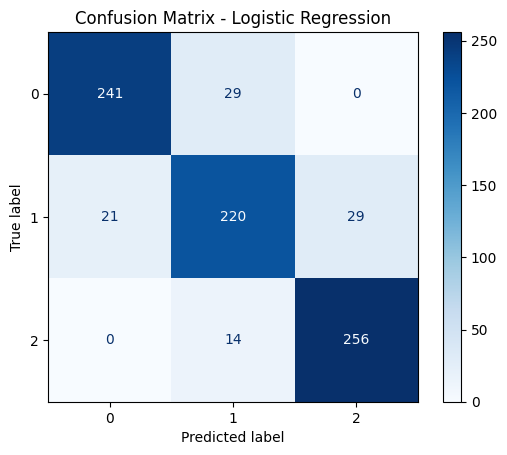

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Use y_test_class (the discretized labels)
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test_class, cmap='Blues')

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

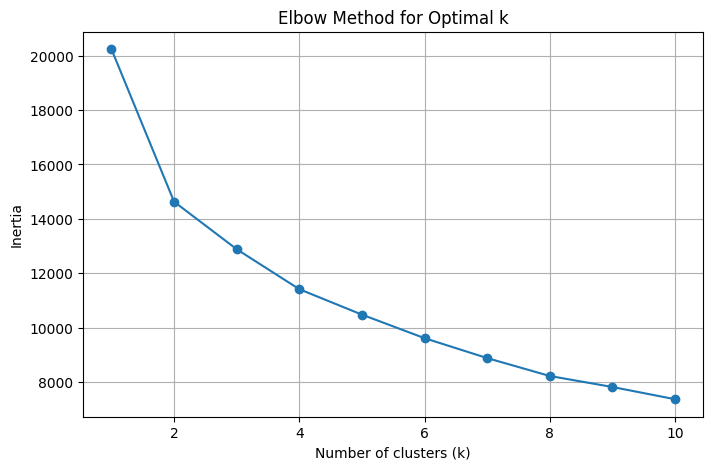

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
# Replace these with the actual column names from your dataset
features = df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']]

# Standardize the features for better performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [79]:
import joblib
joblib.dump(log_model, 'final_logistic_model.pkl')

['final_logistic_model.pkl']

In [80]:
# Create a DataFrame for the class probabilities
prob_df = pd.DataFrame(y_prob_log, columns=[f'Prob_Class_{i}' for i in range(y_prob_log.shape[1])])

# Combine everything into the final results
final_results = X_test.reset_index(drop=True).copy()
final_results['Actual'] = y_test.reset_index(drop=True)
final_results['Predicted'] = y_pred_log
final_results = pd.concat([final_results, prob_df], axis=1)

# Save to CSV
final_results.to_csv("final_model_predictions.csv", index=False)
plt.show()

In [81]:
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

In [82]:
from sklearn.metrics import accuracy_score

# Dictionaries to store results
train_accuracies = {}
test_accuracies = {}

for name, model in models.items():
    # Ensure you're using .predict() for class labels
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #  Ensure both y_train_class and y_train_pred/y_test_pred are class labels
    train_acc = accuracy_score(y_train_class, y_train_pred)  # Use y_train_class
    test_acc = accuracy_score(y_test_class, y_test_pred)  # Use y_test_class

    # Store the results
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc

    # Print results
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")

Logistic Regression - Training Accuracy: 0.9076, Testing Accuracy: 0.8852
Random Forest - Training Accuracy: 1.0000, Testing Accuracy: 0.8815
SVM - Training Accuracy: 0.9036, Testing Accuracy: 0.8765
XGBoost - Training Accuracy: 1.0000, Testing Accuracy: 0.8938
KNN - Training Accuracy: 0.8437, Testing Accuracy: 0.7210


In [83]:
from sklearn.metrics import accuracy_score

# Dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Loop through your final (tuned) models
for name, model in models.items():
    # Fit the model if it's not already fitted
    if not hasattr(model, 'coef_'):  # Check if model is fitted
        model.fit(X_train, y_train_class)  # Fit the model using the training data

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train_class, y_train_pred) # Use y_train_class for classification
    test_acc = accuracy_score(y_test_class, y_test_pred)  # Use y_test_class for classification

    # Store results
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc

    # Print
    print(f"{name} - Training Accuracy: {train_acc:.4f} | Testing Accuracy: {test_acc:.4f}")

Logistic Regression - Training Accuracy: 0.9076 | Testing Accuracy: 0.8852
Random Forest - Training Accuracy: 1.0000 | Testing Accuracy: 0.8815
SVM - Training Accuracy: 0.9036 | Testing Accuracy: 0.8765


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Training Accuracy: 1.0000 | Testing Accuracy: 0.8938
KNN - Training Accuracy: 0.8437 | Testing Accuracy: 0.7210
